In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df=pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df=pd.get_dummies(df,columns=['Geography','Gender'],dtype=int,drop_first=True)

In [13]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [15]:
X_train.shape

(8000, 11)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [17]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2024-05-03 12:51:43.479970: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 12:51:43.480270: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 12:51:43.644349: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [19]:
model=Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [22]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6726 - loss: 0.6250 - val_accuracy: 0.7981 - val_loss: 0.4930
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7921 - loss: 0.4764 - val_accuracy: 0.8019 - val_loss: 0.4583
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8057 - loss: 0.4448 - val_accuracy: 0.8081 - val_loss: 0.4400
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8086 - loss: 0.4291 - val_accuracy: 0.8150 - val_loss: 0.4238
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8219 - loss: 0.3981 - val_accuracy: 0.8200 - val_loss: 0.4099
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8287 - loss: 0.4004 - val_accuracy: 0.8331 - val_loss: 0.3959
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8436 - loss: 0.3832 - val_accuracy: 0.8375 - val_loss: 0.3846
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8414 - loss: 0.3835 - val_accu

accuracy should increase whereas loss should decrease

In [23]:
model.layers[1].get_weights()

[array([[-9.31400806e-02, -3.16776820e-02, -2.86757629e-02,
          3.80057395e-01,  6.28182471e-01,  4.13091853e-04,
          3.76375973e-01, -2.97957093e-01, -3.16659033e-01,
         -7.28686631e-01, -5.20930707e-01],
        [-6.50708377e-01, -3.34607124e-01,  6.00755274e-01,
          7.11452603e-01, -3.32492813e-02,  7.31437922e-01,
         -3.92042339e-01,  1.22272402e-01, -7.31463283e-02,
          2.84175634e-01, -2.18092704e+00],
        [-7.68851340e-01, -3.05705130e-01,  8.56087267e-01,
          7.06906617e-01,  3.58799961e-03,  5.66856563e-01,
          2.33601909e-02,  2.28147969e-01,  5.65647840e-01,
          4.33382899e-01,  4.43729639e-01],
        [ 4.27465998e-02, -9.15282592e-02,  5.70642710e-01,
         -1.53005878e-02,  3.32758218e-01,  1.59077629e-01,
          5.96678674e-01,  6.83405519e-01,  1.34653404e-01,
         -2.27140650e-01,  4.35122475e-02],
        [-2.18076244e-01,  5.94600976e-01, -1.15814231e-01,
         -1.05039492e-01, -2.50807405e-01,  

In [24]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [25]:
y_log

array([[0.01126855],
       [0.1138766 ],
       [0.03013948],
       ...,
       [0.00404981],
       [0.03188874],
       [0.35501504]], dtype=float32)

In [26]:
y_pred=np.where(y_log>0.5,1,0)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.859

In [28]:
import matplotlib.pyplot as plt


In [29]:
history.history# gives the dictionary

{'accuracy': [0.7501562237739563,
  0.7984374761581421,
  0.8065624833106995,
  0.8112499713897705,
  0.8178125023841858,
  0.8293750286102295,
  0.8371875286102295,
  0.8428124785423279,
  0.8487499952316284,
  0.8504687547683716,
  0.856249988079071,
  0.8571875095367432,
  0.8559374809265137,
  0.8570312261581421,
  0.858593761920929,
  0.8626562356948853,
  0.8603125214576721,
  0.8620312213897705,
  0.8614062666893005,
  0.8614062666893005,
  0.8610937595367432,
  0.8621875047683716,
  0.8617187738418579,
  0.8628125190734863,
  0.864062488079071,
  0.8642187714576721,
  0.864062488079071,
  0.8645312786102295,
  0.8646875023841858,
  0.8637499809265137,
  0.8643749952316284,
  0.8662499785423279,
  0.8665624856948853,
  0.8648437261581421,
  0.8671875,
  0.8648437261581421,
  0.8662499785423279,
  0.8642187714576721,
  0.8654687404632568,
  0.8681250214576721,
  0.8646875023841858,
  0.8639062643051147,
  0.8657812476158142,
  0.8656250238418579,
  0.8670312762260437,
  0.8660937

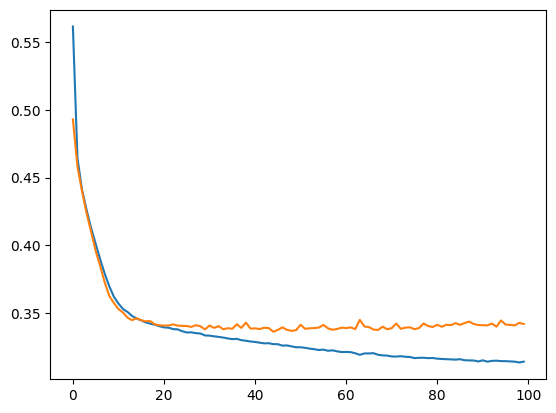

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

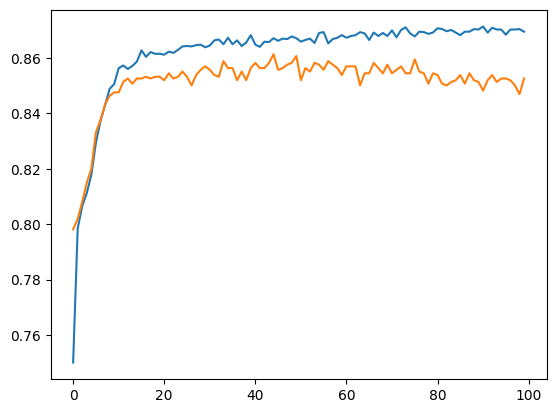

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# close to overfitting